## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [59]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [60]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [61]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [62]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [63]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [64]:
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].shape[0] + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].shape[0]

3893

In [65]:
df.landing_page.value_counts(), df.group.value_counts()

(new_page    147239
 old_page    147239
 Name: landing_page, dtype: int64, treatment    147276
 control      147202
 Name: group, dtype: int64)

f. Do any of the rows have missing values?

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [67]:
df_new = df.drop(df[(df.landing_page == 'new_page') & (df.group != 'treatment')].index)
df2 = df_new.drop(df[(df.landing_page != 'new_page') & (df.group == 'treatment')].index)

In [68]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [69]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [70]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [71]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [72]:
df2.drop_duplicates(keep='first', inplace=True, subset=['user_id', 'group', 'landing_page', 'converted'])

In [73]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [74]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [75]:
df2[df2.group == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [76]:
df2[df2.group == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [77]:
df2.groupby('landing_page')['user_id'].count() / df2.shape[0]

landing_page
new_page    0.500062
old_page    0.499938
Name: user_id, dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**With the results so far, does not seem like the new page is better than the old one as it has a slighlty lower conversion probability.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Ho:**   **$p_{new}$ <= $p_{old}$**

**H1:**   **$p_{new}$ > $p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [78]:
#𝑛𝑒𝑤  and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted success rate regardless of page
p_new = df2[df2.converted == 1]['user_id'].nunique() / (df2['user_id'].nunique())
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [79]:
p_old = df2[df2.converted == 1]['user_id'].nunique() / (df2['user_id'].nunique())
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [80]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [81]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [82]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [83]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [84]:
new_page_converted.mean() - old_page_converted.mean()

0.0015987088485315271

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [85]:
#faster approach
np_conv = np.random.binomial(n_new, p_new, 10000)/ n_new
op_conv = np.random.binomial(n_old, p_old, 10000)/ n_old
p_diffs = np_conv - op_conv


#slower approach

# p_diffs = []
# size = df2.shape[0]
# for _ in range(10000):
#     samp = df2.sample(size, replace=True)
#     np_conv = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
#     op_conv = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
#     p_diffs.append(np_conv.mean() - op_conv.mean()) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

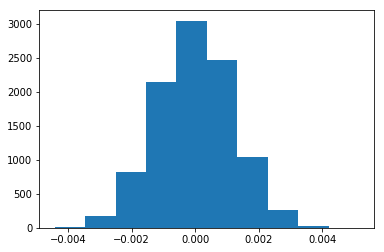

In [86]:
diffs = np.array(p_diffs)
plt.hist(diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

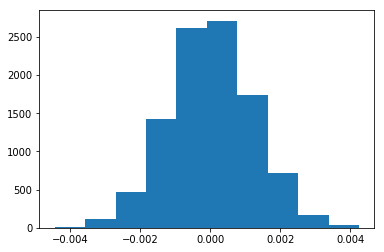

In [87]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);

In [88]:
conv_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
conv_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

act_conv_new = (conv_new)/ (n_new) 
act_conv_old = (conv_old)/ (n_old)

obs_diff = act_conv_new - act_conv_old
obs_diff

-0.0015782389853555567

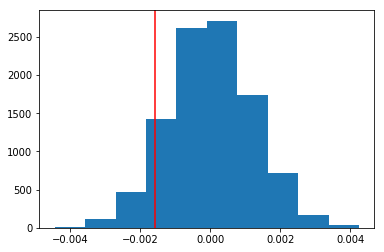

In [89]:
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');

In [90]:
(null_vals > obs_diff).mean()

0.91180000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-Value: the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

**We fail to reject Ho as the p-value is > 0.05 (type 1 error threshold assumed). This means that there is no statistical significance to reject the null hypotesis, therefore the new version is no better, or even worse, than the old version.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [91]:
import statsmodels.api as sm

conv_old, conv_new, n_old, n_new 

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [92]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_val = proportions_ztest(count=np.array([conv_new,conv_old]),nobs=np.array([n_new,n_old]), value=0, alternative='larger')
z_stat, p_val

(-1.3109241984234394, 0.90505831275902449)

In [113]:
from scipy.stats import norm

#critical value for one-tailed test. Probability= 1-alpha= 1 - 0.05
norm.ppf(1-0.05)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**For a 95% confidence interval and for one-tailed test, the critical value for z-score is 1.64. The z-score here, describes the distance from the mean after standardizing the normal distribution around 0. Regarding (https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/) "Critical Value: A value appearing in tables for specified statistical tests indicating at what computed value the null hypothesis can be rejected (the computed statistic falls in the rejection region)." As our z-score is (-1.31) we do not surpass the critical value and therefore fail to reject the null.**

**P-value is very similar to the one calculated manually, so still would fail to reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**A logistic regression since there are 2 categorical outputs, conversion yes or converision no.**

In [94]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [95]:
df2['intercept'] = 1

In [96]:
df2['ab_page'] = pd.get_dummies(df['landing_page'])['new_page']

In [97]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [98]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [99]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        22:01:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190.
It differs from part II because when applying logistic regression, the test uses = for the null and != for the alternative hypothesis.
In the initial test we used for the null that (<=) the new page was worse or equal than the old, and the alternative was that the new was better.
For the logistic regression the null states that new and old pages are equal, and alternative is that they are different.**

**Taking into account that null hypothesis is considered true until proven otherwise, the p-value is different because the tests are different. Although both fail to reject the null. 1st failed to reject that the new page was worse or equal and in the log. regression we failed to reject that they are equal**

**Also important to note that in part II the test is one one-tailed and on the logistic regression is two-tailed due to having the alternative hypothesis as a difference of zero (so the difference can be given by Ha: diff < 0 or Ha: diff > 0, so should consider the two tails.

In [115]:
#critical value for z-score for two tailed test.
norm.ppf(1-(0.05/2)) 

1.959963984540054

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We could use the remaining variable Timestamp to check if day/hour of the day influences conversion.
Considering adding new factors to the model is a good idea because we can analyze how the different variables improve or not our model and how these affect weights.**

**The disadvantages could be the interpretation of results turns more complex as we have to use exponentials. There could be multicollinearity between the variables of the model (where x-variables are dependant with one another) and the use of higher order terms could improve our model but would also have the though interpretative side**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [101]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [102]:
df3 = df2.join(df_countries.set_index('user_id'), on='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [103]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3.country)

In [104]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [105]:
df3['intercept'] = 1

log3 = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK','US']])
result = log3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        22:01:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [106]:
[1/ np.exp(-2.0300)] ,[1/ np.exp(-0.0149)],  np.exp(0.0506), np.exp(0.0408)

([7.6140863587799723],
 [1.0150115583846535],
 1.0519020483004984,
 1.0416437559600236)

**For 1 unit decrease in ab_page (new_page), conversion is 1.05 times more likely to happen if holding all else cte.**

**For each +1 UK costumer, conversion is 1.052 times more likely to happen if holding all else cte.**

**For each +1 US costumer, conversion is 1.041 times more likely to happen if holding all else cte.**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [107]:
df3['UK_ab_page'] = df3['ab_page']* df3['UK']
df3['US_ab_page'] = df3['ab_page']* df3['US']

In [108]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [109]:
log4 = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK_ab_page','US_ab_page','UK','US']])
result4 = log4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        22:01:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

In [110]:
[1/ np.exp(-2.00400)] ,[1/ np.exp(-0.0674)], np.exp(0.0783), np.exp(0.0469), np.exp(0.0118), np.exp(0.0175)

([7.4186715146706428],
 [1.0697232819209153],
 1.0814470441230692,
 1.0480172021191829,
 1.011869894648401,
 1.0176540221507617)

- The only significant coeficient is the intercept's coef. with p-value < 0.05.

- Convert is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.
 
- Convert is 1.04 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

- The ab_page, UK and US coeficients are very low so these variables do not seem very significant for the converted rate.

- Every unit ab_page decreases (new_pages), convert will be 1.07 times more likely to happen holding all other varible constant.
 
- Convert is 1.018 % more likely to happen for the users in UK than CA, holding all other varible constant.
 
- Convert is 1.076 % more likely to happen for the users in US than CA, holding all other varible constant.

In [120]:
df3.timestamp.max(), df3.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

__Conclusion__

**With the results given until this point we should fail to reject the null hypothesis, therefore stay with the old page. However, analyzing the timestamps we've seen that the test has only been running for 22 days and given that both means were very close (the probability they converted was: 0.12 for oldpage and 0.118 for new-page) we would suggest extending the test to clarify or accentuate the difference.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [111]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0